# LR示例

以下示例仅用于说明LR的工作流程，目前仅支持单机测试。

初始化mpc设备

In [1]:
from common import MPCInitializer
import secretflow as sf
mpc_init = MPCInitializer()
company, partner, coordinator = mpc_init.company, mpc_init.partner, mpc_init.coordinator
spu = mpc_init.spu

# 设置设备
devices = {
    'spu': spu,
    'company': company,
    'partner': partner,
    'coordinator': coordinator,
    'active_party': partner # 验证集预测结果将揭露给active_party
}

heu_devices = (mpc_init.company_heu, mpc_init.partner_heu)

/home/lvx_vitae/AnonymVFL/.conda/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/home/lvx_vitae/AnonymVFL/.conda/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2025-08-28 15:42:57,395	INFO worker.py:1841 -- Started a local Ray instance.


(SPURuntime pid=243873) 2025-08-28 15:43:01.382 [warning] [openssl_factory.cc:OpensslDrbg:83] Yacl has been configured to use Yacl's entropy source, but unable to find one. Fallback to use openssl's default entropy srouce
(SPURuntime pid=243873) 2025-08-28 15:43:01.383 [warning] [openssl_factory.cc:OpensslDrbg:83] Yacl has been configured to use Yacl's entropy source, but unable to find one. Fallback to use openssl's default entropy srouce


(HEUSkKeeper(heu_id=133641248831280, party=company) pid=243881) [2025-08-28 15:43:05.796] [info] [thread_pool.cc:30] Create a fixed thread pool with size 15
(HEUEvaluator(heu_id=133641113251712, party=company) pid=243877) [2025-08-28 15:43:13.725] [info] [thread_pool.cc:30] Create a fixed thread pool with size 15 [repeated 3x across cluster]


(pyu_fn pid=243884) 2025-08-28 15:48:09,237,237 INFO [xla_bridge.py:backends:863] Unable to initialize backend 'cuda': 
(pyu_fn pid=243884) 2025-08-28 15:48:09,238,238 INFO [xla_bridge.py:backends:863] Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
(pyu_fn pid=243884) 2025-08-28 15:48:09,239,239 INFO [xla_bridge.py:backends:863] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
(pyu_fn pid=243884) 2025-08-28 15:48:09,239,239 WARNING [xla_bridge.py:_suggest_missing_backends:901] An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


(pyu_fn pid=243884) [2025-08-28 15:48:09.253] [info] [thread_pool.cc:30] Create a fixed thread pool with size 15
(pyu_fn pid=243884) [2025-08-28 15:48:09.268] [warning] [openssl_factory.cc:83] Yacl has been configured to use Yacl's entropy source, but unable to find one. Fallback to use openssl's default entropy srouce
(pyu_fn pid=243884) [2025-08-28 15:48:09.269] [warning] [openssl_factory.cc:83] Yacl has been configured to use Yacl's entropy source, but unable to find one. Fallback to use openssl's default entropy srouce
(SPURuntime(device_id=None, party=company) pid=243873) 2025-08-28 15:48:11.044 [info] [thread_pool.cc:ThreadPool:30] Create a fixed thread pool with size 15


(pyu_fn pid=243876) 2025-08-28 15:48:11,863,863 INFO [xla_bridge.py:backends:863] Unable to initialize backend 'cuda': 
(pyu_fn pid=243876) 2025-08-28 15:48:11,863,863 INFO [xla_bridge.py:backends:863] Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
(pyu_fn pid=243876) 2025-08-28 15:48:11,864,864 INFO [xla_bridge.py:backends:863] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
(pyu_fn pid=243876) 2025-08-28 15:48:11,864,864 INFO [xla_bridge.py:backends:863] Unable to initialize backend 'interpreter': jaxlib.xla_extension.Client: no constructor defined!
(pyu_fn pid=243876) 2025-08-28 15:48:11,864,864 WARNING [xla_bridge.py:_suggest_missing_backends:901] An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


(pyu_fn pid=243876) [2025-08-28 15:48:11.957] [warning] [openssl_factory.cc:83] Yacl has been configured to use Yacl's entropy source, but unable to find one. Fallback to use openssl's default entropy srouce
(pyu_fn pid=243876) [2025-08-28 15:48:11.958] [warning] [openssl_factory.cc:83] Yacl has been configured to use Yacl's entropy source, but unable to find one. Fallback to use openssl's default entropy srouce
(pyu_fn pid=243884) Directory '../partner_model' created or already exists.
(pyu_fn pid=243876) Directory '../company_model' created or already exists.


(raylet) [2025-08-28 18:24:57,497 E 243778 243778] node_manager.cc:3178: 1 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: da695badf0c4466896afcd77095736f41f8be6f0bf59802792c0b594, IP: 192.168.10.7) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 192.168.10.7`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.
(raylet) 
(raylet) [2025-08-28 18:25:57,498 E 243778 243778] node_manager.cc:3178: 4 Workers (tasks / actors) killed due to 

双方读取数据集。数据集为csv格式，应满足第一列为id或键值。其他列为数值型特征。标签列的列标题为'y'。

将键值和特征分开读取。

In [2]:
import pandas as pd
import os
import numpy as np
project_dir = os.path.dirname(os.path.abspath(''))

def read_dataset(path: str):
    data = pd.read_csv(path)
    keys = data.iloc[:, 0].astype(str).tolist()
    private_features = data.iloc[:, 1:].to_numpy(dtype=np.float32)
    header = data.columns.tolist()
    return (keys, private_features,None), header
company_data, company_header = company(read_dataset,num_returns=2)(os.path.join(project_dir, 'Datasets/data/data/breast_hetero_host.csv'))
partner_data, partner_header = partner(read_dataset,num_returns=2)(os.path.join(project_dir, 'Datasets/data/data/breast_hetero_guest.csv'))
company_header = sf.reveal(company_header)
partner_header = sf.reveal(partner_header)
#输出交集的列标题
header = company_header[1:] + partner_header[1:]
#记录标签列的索引
y_col = header.index('y')

执行PSI

求交后得到交集共享分片，分别由company和partner持有。原本company数据的特征在share的左侧，partner数据的特征在右侧。

In [3]:
from PSI import private_set_intersection
company_share, partner_share, bucket_labels = private_set_intersection(company_data, partner_data,heu_devices)
company_share.device(np.savetxt)('../company_share.csv',company_share, delimiter=',')
partner_share.device(np.savetxt)('../partner_share.csv',partner_share, delimiter=',')

Computing masked company cipher
Computing masked partner cipher
Computing company shares
Computing partner shares


将训练集转移到对应设备

In [4]:
from secretflow.data.ndarray import load
def split_X_y(share):
    X = np.delete(share, y_col, axis=1)
    y = share[:, y_col].reshape(-1, 1)
    return X, y

def share2spu(company_share, partner_share):
    company_share = company_share.to(spu)
    partner_share = partner_share.to(spu)
    return spu(lambda x, y : x + y)(company_share, partner_share)

X_train_company, y_train_company = company(split_X_y,num_returns=2)(company_share)
X_train_partner, y_train_partner = partner(split_X_y,num_returns=2)(partner_share)
X_train = share2spu(X_train_company, X_train_partner)
y_train = devices['active_party'](lambda x, y : x + y)(y_train_company.to(devices['active_party']), y_train_partner.to(devices['active_party']))


读取验证集

In [5]:
def read_val_dataset(path):
    data = pd.read_csv(path)
    private_features = data.iloc[:, 1:].to_numpy(dtype=np.float32)
    return private_features
X_test_company = company(read_val_dataset)(os.path.join(project_dir, 'Datasets/data/data/breast_hetero_host_test.csv'))
X_test_partner = partner(read_val_dataset)(os.path.join(project_dir, 'Datasets/data/data/breast_hetero_guest_test.csv'))
X_test_partner, y_test = partner(lambda arr : (arr[:,:-1], arr[:,-1].reshape(-1,1)),num_returns=2)(X_test_partner)
X_test = load({company: X_test_company, partner: X_test_partner})


训练指定的轮次

100%|██████████| 8/8 [00:00<00:00, 104.72it/s]


Epoch 1


1it [00:00,  1.81it/s]

Iteration 0, Accuracy: 0.9988


8it [00:01,  7.27it/s]


Epoch 2


6it [00:00, 12.83it/s]

Iteration 10, Accuracy: 1.0000


8it [00:00, 13.09it/s]


Epoch 3


8it [00:00, 13.03it/s]


Iteration 20, Accuracy: 1.0000
Epoch 4


8it [00:00, 13.04it/s]


Iteration 30, Accuracy: 1.0000
Epoch 5


8it [00:00, 14.48it/s]


Epoch 6


2it [00:00,  5.32it/s]

Iteration 40, Accuracy: 1.0000


8it [00:00,  8.94it/s]


Epoch 7


6it [00:00, 12.83it/s]

Iteration 50, Accuracy: 1.0000


8it [00:00, 13.09it/s]


Epoch 8


8it [00:00, 13.20it/s]


Iteration 60, Accuracy: 1.0000
Epoch 9


8it [00:00, 13.00it/s]


Iteration 70, Accuracy: 1.0000
Epoch 10


8it [00:00, 14.73it/s]


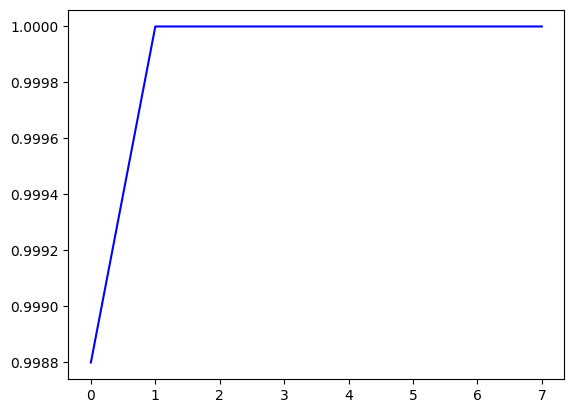

In [6]:
from LR import SSLR
import matplotlib.pyplot as plt

model = SSLR(devices, approx=False)
accs = model.fit(X_train, y_train, X_test, y_test, n_epochs=10, batch_size=1024, val_steps=10, lr=0.1)
model.save({
    'company': '../company_model',
    'partner': '../partner_model',
},ext='csv')
plt.plot(accs,label = "SSLR",color = "blue")
